In [1]:
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
    
from RL_for_lp.trainer import Trainer
from RL_for_lp.agents.tabular import *
from utils.dataset import GeneratedDataset

## Experiment with different sampling strategies in tabular Q

In [15]:
DIM = 10
dataset = GeneratedDataset(dim=DIM)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

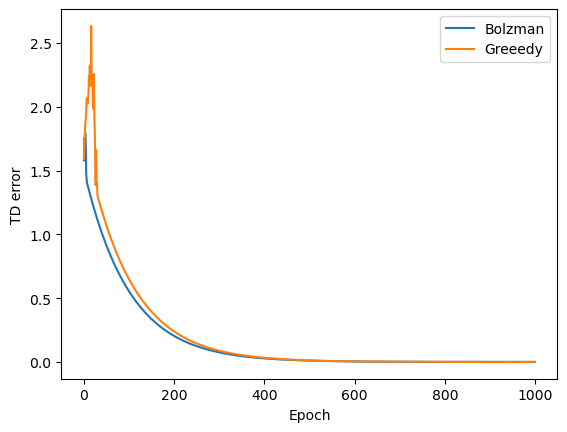

In [61]:
td_strat = {}

EPOCHES = 10000
TRAIN_FREQ = 10
ALPHA = 0.1
GAMMA = 0.99

# Eps greedy
sampling_strategy = TEpsGreedy(epsilon=1.0, n_epoch=EPOCHES)
sampling_strategy = TBolzmanSampling(temperature=1.0)
agent = TQAgent(dim = DIM, gamma=GAMMA, alpha=ALPHA, sampling_strategy=sampling_strategy)
trainer_e = Trainer(agent, dataset, epoches = EPOCHES, train_freq = TRAIN_FREQ)
trainer_e.train()
td_strat['greedy'] = trainer_e.metrics['train_td']

# Bolzman
sampling_strategy = TBolzmanSampling(temperature=0.3)
agent_b = TQAgent(dim = DIM, gamma=GAMMA, alpha=ALPHA, sampling_strategy=sampling_strategy)
trainer_b = Trainer(agent_b, dataset, epoches = EPOCHES, train_freq = TRAIN_FREQ)
trainer_b.train()
td_strat['bolzman'] = trainer_b.metrics['train_td']

plt.plot(td_strat['bolzman'], label='Bolzman')
plt.plot(td_strat['greedy'], label='Greeedy')
plt.xlabel('Epoch')
plt.ylabel('TD error')
plt.legend()


Trajectory length 4.096447080404761


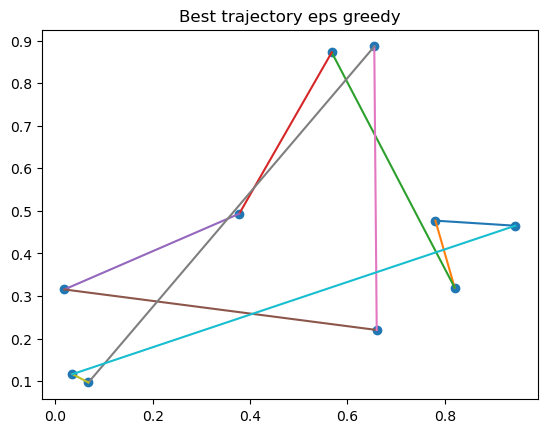

In [62]:
print('Trajectory length', trainer_e.get_best_trajectory()['length'])
plt.title('Best trajectory eps greedy')
trainer_e.plot_best()

Trajectory length 5.176846409402212


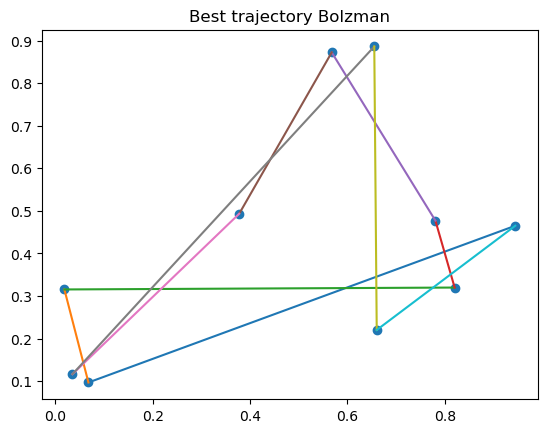

In [63]:
print('Trajectory length', trainer_b.get_best_trajectory()['length'])
plt.title('Best trajectory Bolzman')
trainer_b.plot_best()